# Data Analysis - Brazilian E-Commerce Public Dataset by Olist

In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

## Preparing the data

In [2]:
# data

df_customers = pd.DataFrame(pd.read_csv('olist_customers_dataset.csv'))

df_orders_items = pd.DataFrame(pd.read_csv('olist_order_items_dataset.csv'))

df_orders_payments = pd.DataFrame(pd.read_csv('olist_order_payments_dataset.csv'))

df_orders_reviews = pd.DataFrame(pd.read_csv('olist_order_reviews_dataset.csv'))

df_orders = pd.DataFrame(pd.read_csv('olist_orders_dataset.csv'))

df_products = pd.DataFrame(pd.read_csv('olist_products_dataset.csv'))

df_sellers = pd.DataFrame(pd.read_csv('olist_sellers_dataset.csv'))

df_product_categories = pd.DataFrame(pd.read_csv('product_category_name_translation.csv'))

In [3]:
# customers --> customers_id, customer_city, customer_state
# orders_items --> order_id, order_item_id, product_id, seller_id, price, freight_value
# orders_paymets --> order_id, payment_sequential, payment_type, payment_installmets, payment_value
# orders_reviews --> order_id, review_score
# orders --> order_id, customer_id, order_status, order_purchase_timestamp, order_delivered_customer_date, order_estimated_delivery_date
# products --> product_id, product_category_name
# product_categories --> product_category_name, product_category_name_english 

In [4]:
# merge product_category_name to df_orders

df_orders = df_orders.merge(df_orders_items[['order_id', 'product_id']], on='order_id')

df_orders = df_orders.merge(df_products[['product_id', 'product_category_name']], on='product_id')

df_orders

display(df_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumaria
...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,0df37da38a30a713453b03053d60d3f7,esporte_lazer
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,0df37da38a30a713453b03053d60d3f7,esporte_lazer
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,3d2c44374ee42b3003a470f3e937a2ea,instrumentos_musicais
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,ac35486adb7b02598c182c2ff2e05254,beleza_saude


In [5]:
# converting dates from strings to datetime

df_orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [6]:
# Filtering only not canceled orders

df_orders_nc = df_orders.query("order_status != 'canceled'")
df_orders_nc

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,87285b34884572647811a353c7ac498a,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,87285b34884572647811a353c7ac498a,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,87285b34884572647811a353c7ac498a,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,perfumaria
...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,0df37da38a30a713453b03053d60d3f7,esporte_lazer
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,0df37da38a30a713453b03053d60d3f7,esporte_lazer
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,3d2c44374ee42b3003a470f3e937a2ea,instrumentos_musicais
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,ac35486adb7b02598c182c2ff2e05254,beleza_saude


In [7]:
# checking

df_orders_nc['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'unavailable',
       'approved'], dtype=object)

In [8]:
# ordering the dataset by date of purchase

df_orders_nc = df_orders_nc.sort_values(by='order_purchase_timestamp', ascending=False)
df_orders_nc

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
78809,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,b98992ea80b467987a7fbb88e7f2076a,moveis_cozinha_area_de_servico_jantar_e_jardim
29292,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,d04857e7b4b708ee8b8b9921163edba3,informatica_acessorios
104707,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,c7f27c5bef2338541c772b5776403e6a,artigos_de_festas
45367,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude
60550,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,2b4472df15512a2825ae86fd9ae79335,moveis_cozinha_area_de_servico_jantar_e_jardim
...,...,...,...,...,...,...,...,...,...,...
49452,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49450,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49451,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
32995,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,moveis_decoracao


In [9]:
order_purchase_date = df_orders_nc['order_purchase_timestamp'].dt

In [10]:
# creating the order_purchase_year and the order_purchase_month columns

df_orders_nc.insert(4, 'order_purchase_year', order_purchase_date.year)

df_orders_nc.insert(5, 'order_purchase_month', order_purchase_date.month)

df_orders_nc.insert(6, 'order_purchase_month_name', order_purchase_date.month_name())

df_orders_nc

,order_id,customer_id,order_status,order_purchase_timestamp,order_purchase_year,order_purchase_month,order_purchase_month_name,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
78809,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018,9,September,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,b98992ea80b467987a7fbb88e7f2076a,moveis_cozinha_area_de_servico_jantar_e_jardim
29292,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018,8,August,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,d04857e7b4b708ee8b8b9921163edba3,informatica_acessorios
104707,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018,8,August,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,c7f27c5bef2338541c772b5776403e6a,artigos_de_festas
45367,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018,8,August,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude
60550,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018,8,August,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,2b4472df15512a2825ae86fd9ae79335,moveis_cozinha_area_de_servico_jantar_e_jardim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49452,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016,9,September,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49450,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016,9,September,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49451,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016,9,September,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
32995,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016,9,September,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,moveis_decoracao


## 1. Sales

## 1.1 Yearly growth 

Vamos analisar o crescimento da empresa e verificar o quanto ele se alterou durante o período registrado na base de dados.

In [11]:
# verificando as vendas anuais

In [12]:
df_orders_year = df_orders_nc.groupby('order_purchase_year')[['order_id']].count()

df_orders_year

,order_id
order_purchase_year,
2016,355
2017,50617
2018,61136


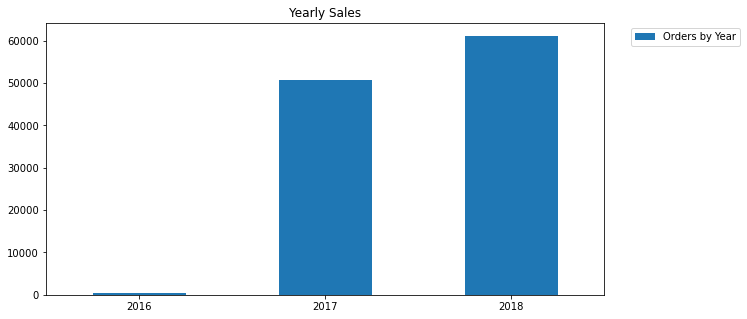

In [13]:
graph_orders_years = df_orders_year['order_id'].plot(kind='bar', figsize=(10,5), title='Yearly Sales', xlabel='', 
                                                  rot=0).legend(['Orders by Year'], loc='upper left', 
                                                                bbox_to_anchor=(1.04, 1))

## 1.2. Monthly Sales

In [14]:
df_orders_month = df_orders_nc.groupby(['order_purchase_year','order_purchase_month','order_purchase_month_name'], as_index=False)[['order_id']].count()

df_orders_month

,order_purchase_year,order_purchase_month,order_purchase_month_name,order_id
0,2016,9,September,5
1,2016,10,October,349
2,2016,12,December,1
3,2017,1,January,953
4,2017,2,February,1936
5,2017,3,March,2975
6,2017,4,April,2660
7,2017,5,May,4106
8,2017,6,June,3571
9,2017,7,July,4493


<AxesSubplot:>

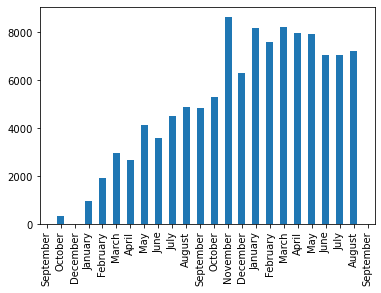

In [28]:
ax = df_orders_month['order_id'].plot.bar()
# ax.set_xticks(df_orders_month.index)
ax.set_xticklabels(df_orders_month['order_purchase_month_name'], rotation=90)

ax

## 1.3. Relative Growth by Year

In [16]:
# analizamos, então a média de vendas por mês em cada ano

df_orders_avg_month = df_orders_month.groupby('order_purchase_year', sort=False)[['order_id']].mean().astype(int)

df_orders_avg_month['growth'] = df_orders_avg_month['order_id'].pct_change()

df_orders_avg_month

,order_id,growth
order_purchase_year,,
2016,118,NaN
2017,4218,34.745763
2018,6792,0.610242


## 1.4. Avg Number of Orders per Month

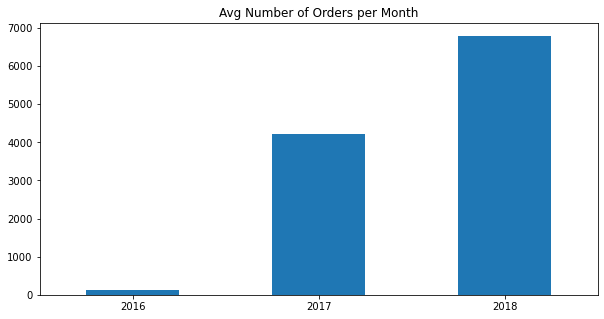

In [17]:
df_rel_growth_graph = df_orders_avg_month['order_id'].plot(kind='bar', figsize=(10,5), 
                                                           title='Avg Number of Orders per Month', xlabel='', rot=0,
                                                           legend=False)

## 1.5. Monthly Average Sales by Year

In [18]:
monthly_avg_sales_graph = df_orders_month.unstack(level=0)#.plot(kind='bar',
#                                                                 title='Monthly Average Sales by Year',
#                                                                 xlabel='',
#                                                                ).legend(['2016','2017','2018'],loc='upper left', bbox_to_anchor=(1.04,1))

In [19]:
monthly_avg_sales_graph

order_purchase_year  0     2016
                     1     2016
                     2     2016
                     3     2017
                     4     2017
                           ... 
order_id             19    7898
                     20    7060
                     21    7039
                     22    7216
                     23       1
Length: 96, dtype: object

## 1.6. Calculating the relative growth per month 

In [20]:
df_orders_avg_month_year = df_orders_month.pivot_table(values='order_id', index='order_purchase_month', columns='order_purchase_year', aggfunc='mean').fillna(0)
df_orders_avg_month_year

order_purchase_year,2016,2017,2018
order_purchase_month,,,
1,0.0,953.0,8173.0
2,0.0,1936.0,7597.0
3,0.0,2975.0,8195.0
4,0.0,2660.0,7957.0
5,0.0,4106.0,7898.0
6,0.0,3571.0,7060.0
7,0.0,4493.0,7039.0
8,0.0,4882.0,7216.0
9,5.0,4815.0,1.0


In [21]:
df_orders_avg_month_year['growth2017_2018'] = (df_orders_avg_month_year[2018] - df_orders_avg_month_year[2017])/df_orders_avg_month_year[2017]

df_orders_avg_month_year

order_purchase_year,2016,2017,2018,growth2017_2018
order_purchase_month,,,,
1,0.0,953.0,8173.0,7.576076
2,0.0,1936.0,7597.0,2.924070
3,0.0,2975.0,8195.0,1.754622
4,0.0,2660.0,7957.0,1.991353
5,0.0,4106.0,7898.0,0.923527
6,0.0,3571.0,7060.0,0.977037
7,0.0,4493.0,7039.0,0.566659
8,0.0,4882.0,7216.0,0.478083
9,5.0,4815.0,1.0,-0.999792


<AxesSubplot:xlabel='order_purchase_month'>

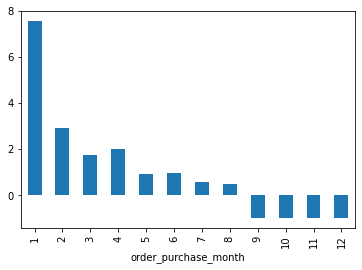

In [23]:
df_orders_avg_month_year['growth2017_2018'].plot.bar()